In [2]:
# 修改pandas默认的现实设置
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',10)  
pd.set_option('display.max_rows',20)  
#禁用科学计数法
np.set_printoptions(suppress=True,   precision=10,  threshold=2000,  linewidth=150)  
pd.set_option('display.float_format',lambda x : '%.2f' % x)

## 赛题模型验证

In [3]:
## 导入工具
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor  #决策树回归
from sklearn.ensemble import RandomForestRegressor  #随机森林回归
from sklearn.svm import SVR  #支持向量回归
from sklearn.model_selection import train_test_split  # 切分数据
from sklearn.metrics import mean_squared_error  #评价指标
from sklearn.linear_model import SGDRegressor

In [4]:
## 读取数据
train_data_file = "./zhengqi_train.txt"
test_data_file =  "./zhengqi_test.txt"
train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

## 绘制各个特征的箱线图

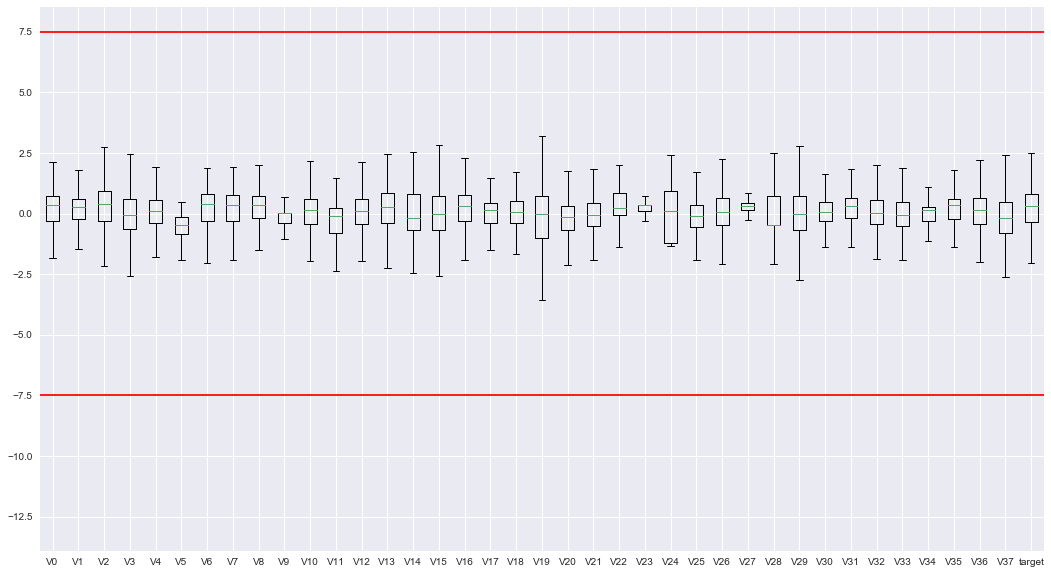

In [5]:
plt.figure(figsize=(18, 10))
plt.boxplot(x=train_data.values,labels=train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors='r')
plt.show()

## 删除异常值

In [6]:
train_data = train_data[train_data['V9']>-7.5]
test_data = test_data[test_data['V9']>-7.5]
train_data.describe()
test_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,0.838049,-0.274092,-0.173971,-0.266709,0.255114,...,-0.206871,-0.146463,-0.083215,-0.191729,-0.030782,-0.011433,-0.009985,-0.296895,-0.046270,0.195735
std,1.073333,1.076670,0.969541,1.034925,1.147286,0.963043,1.054119,1.040101,1.085916,1.014394,...,1.064140,0.880593,1.126414,1.138454,1.130228,0.989732,0.995213,0.946896,1.040854,0.940599
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-1.168000,-5.649000,-5.625000,-6.059000,-6.784000,...,-2.435000,-2.413000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.346000
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,0.122000,-0.732000,-0.509000,-0.775000,-0.390000,...,-0.453000,-0.818000,-0.339000,-0.476000,-0.472000,-0.460000,-0.290000,-0.349000,-0.593000,-0.432000
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,0.437000,-0.082000,0.018000,-0.004000,0.401000,...,-0.445000,-0.199000,0.010000,0.100000,0.155000,-0.040000,0.160000,-0.270000,0.083000,0.152000
75%,0.549000,0.589000,0.278000,0.793000,0.610000,1.928000,0.457000,0.515000,0.482000,0.904000,...,-0.434000,0.468000,0.447000,0.471000,0.627000,0.419000,0.273000,0.364000,0.651000,0.797000
max,2.100000,2.120000,1.946000,2.603000,4.475000,3.176000,1.528000,1.394000,2.408000,1.766000,...,4.656000,3.022000,3.139000,1.428000,2.299000,5.465000,5.110000,1.671000,2.861000,3.021000


In [40]:
## 归一化处理
from sklearn import preprocessing 
features_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[features_columns])
train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])
train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns
test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns
train_data_scaler['target'] = train_data['target']

In [41]:
#PCA方法降维
from sklearn.decomposition import PCA   #主成分分析法
#保留16个主成分
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']

In [45]:
#保留16维特征并切分数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']
# 切分数据 训练数据80% 验证数据20%
train_data, test_data, train_target, test_target = train_test_split(
    train, target, test_size=0.2, random_state=0)

## 欠拟合情况

In [46]:
clf = SGDRegressor(max_iter=500, tol=1e-2) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.151463981412985
SGDRegressor test MSE:    0.15582443408189456


## 过拟合情况

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, 
                                 clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, 
                                clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.1330248157674981
SGDRegressor test MSE:    0.14559928859802745


## 正常拟合

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13423885909686148
SGDRegressor test MSE:    0.1427494025552031


### 模型正则化

**L2范数正则化**

In [49]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L2', alpha=0.0001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13323787756476335
SGDRegressor test MSE:    0.14187259762046708


**L1范数正则化**

In [51]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L1', alpha=0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13511036183307598
SGDRegressor test MSE:    0.14332864452241414


### 模型交叉验证

**简单交叉验证 Hold-out-menthod**

In [55]:
# 简单交叉验证
from sklearn.model_selection import train_test_split  # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data, test_data, train_target, test_target = train_test_split(
    train, target, test_size=0.2, random_state=0)

clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.14161348155004896
SGDRegressor test MSE:    0.14710821468956675


**K折交叉验证 K-fold CV**

In [56]:
# 5折交叉验证
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    train_data, test_data, train_target, test_target = train.values[
        train_index], train.values[test_index], target[train_index], target[
            test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 折", "SGDRegressor train MSE:   ", score_train)
    print(k, " 折", "SGDRegressor test MSE:   ", score_test, '\n')

0  折 SGDRegressor train MSE:    0.14987519063138968
0  折 SGDRegressor test MSE:    0.1060328439968145 

1  折 SGDRegressor train MSE:    0.13348513688408262
1  折 SGDRegressor test MSE:    0.18223249632622965 

2  折 SGDRegressor train MSE:    0.14726773006341226
2  折 SGDRegressor test MSE:    0.1333875735612879 

3  折 SGDRegressor train MSE:    0.14070672027424191
3  折 SGDRegressor test MSE:    0.16188645467771542 

4  折 SGDRegressor train MSE:    0.1387380473396963
4  折 SGDRegressor test MSE:    0.16578847813134126 



**留一法**

In [57]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
num = 100
for k, (train_index, test_index) in enumerate(loo.split(train)):
    train_data, test_data, train_target, test_target = train.values[
        train_index], train.values[test_index], target[train_index], target[
            test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 个", "SGDRegressor test MSE:   ", score_test, '\n')
    if k >= 9:
        break

0  个 SGDRegressor train MSE:    0.1416361883685269
0  个 SGDRegressor test MSE:    0.010073006442686173 

1  个 SGDRegressor train MSE:    0.14150088537573924
1  个 SGDRegressor test MSE:    0.12223831229426645 

2  个 SGDRegressor train MSE:    0.14151483414511198
2  个 SGDRegressor test MSE:    0.03860355577845687 

3  个 SGDRegressor train MSE:    0.14159754755399034
3  个 SGDRegressor test MSE:    0.0036852651965835117 

4  个 SGDRegressor train MSE:    0.1416319203961655
4  个 SGDRegressor test MSE:    0.012302690522310006 

5  个 SGDRegressor train MSE:    0.14092006868236745
5  个 SGDRegressor test MSE:    0.14565501477002468 

6  个 SGDRegressor train MSE:    0.1415255897987022
6  个 SGDRegressor test MSE:    0.02482892017395111 

7  个 SGDRegressor train MSE:    0.14100323573907528
7  个 SGDRegressor test MSE:    0.0013065832128669186 

8  个 SGDRegressor train MSE:    0.14158099844010494
8  个 SGDRegressor test MSE:    0.08967848274344706 

9  个 SGDRegressor train MSE:    0.14171420289072534


**留P法 LPO CV**

In [59]:
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=10)
num = 100
for k, (train_index, test_index) in enumerate(lpo.split(train)):
    train_data, test_data, train_targetarget, test_target = train.values[
        train_index], train.values[test_index], target[train_index], target[
            test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 10个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 10个", "SGDRegressor test MSE:   ", score_test, '\n')
    if k >= 9:
        break

0  10个 SGDRegressor train MSE:    0.14190833532181063
0  10个 SGDRegressor test MSE:    0.04941961238187924 

1  10个 SGDRegressor train MSE:    0.14138481844698866
1  10个 SGDRegressor test MSE:    0.04372153210164471 

2  10个 SGDRegressor train MSE:    0.14205969283287678
2  10个 SGDRegressor test MSE:    0.04594238283760854 

3  10个 SGDRegressor train MSE:    0.141949223537575
3  10个 SGDRegressor test MSE:    0.05446609330153962 

4  10个 SGDRegressor train MSE:    0.14194814408072978
4  10个 SGDRegressor test MSE:    0.06901778463810983 

5  10个 SGDRegressor train MSE:    0.1419081890636233
5  10个 SGDRegressor test MSE:    0.0451405014060003 

6  10个 SGDRegressor train MSE:    0.14197777894847222
6  10个 SGDRegressor test MSE:    0.049461335330664456 

7  10个 SGDRegressor train MSE:    0.14192898721929645
7  10个 SGDRegressor test MSE:    0.05282934484860422 

8  10个 SGDRegressor train MSE:    0.14197706873590443
8  10个 SGDRegressor test MSE:    0.04731840934915386 

9  10个 SGDRegressor tr

### 模型超参空间及调参

**穷举网格搜索**

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split  # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data, test_data, train_target, test_target = train_test_split(
    train, target, test_size=0.2, random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {'n_estimators': [50, 100, 200], 'max_depth': [1, 2, 3]}
clf = GridSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)
score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor GridSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor GridSearchCV test MSE:    0.256107108970348


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

**随机参数优化**

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split  # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data, test_data, train_target, test_target = train_test_split(
    train, target, test_size=0.2, random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [1, 2, 3, 4, 5]
}
clf = RandomizedSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)
score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor RandomizedSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor RandomizedSearchCV test MSE:    0.19636861894590119


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

**Lgb 调参**

In [62]:
import lightgbm as lgb
clf = lgb.LGBMRegressor(num_leaves=31)

parameters = {'learning_rate': [0.01, 0.1, 1], 'n_estimators': [20, 40]}
clf = GridSearchCV(clf, parameters, cv=5)
clf.fit(train_data, train_target)

print('Best parameters found by grid search are:', clf.best_params_)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("LGBMRegressor GridSearchCV test MSE:   ", score_test)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 40}
LGBMRegressor RandomizedSearchCV test MSE:    0.1498258125289947


**Lgb 线下验证**

In [66]:
train_data2 = pd.read_csv('./zhengqi_train.txt', sep='\t')
test_data2 = pd.read_csv('./zhengqi_test.txt', sep='\t')

train_data2_f = train_data2[test_data2.columns].values
train_data2_target = train_data2['target'].values

# lgb 模型
from sklearn.model_selection import KFold
import lightgbm as lgb
import numpy as np

# 5折交叉验证
Folds = 5
kf = KFold(n_splits=Folds, shuffle=True, random_state=2019)
# 记录训练和预测MSE
MSE_DICT = {'train_mse': [], 'test_mse': []}

# 线下训练预测
for i, (train_index, test_index) in enumerate(kf.split(train_data2_f)):
    # lgb树模型
    lgb_reg = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=5000,
        boosting_type='gbdt',
        random_state=2019,
        objective='regression',
    )
    # 切分训练集和预测集
    X_train_KFold, X_test_KFold = train_data2_f[train_index], train_data2_f[
        test_index]
    y_train_KFold, y_test_KFold = train_data2_target[
        train_index], train_data2_target[test_index]
    # 训练模型
    lgb_reg.fit(X=X_train_KFold,
                y=y_train_KFold,
                eval_set=[(X_train_KFold, y_train_KFold),
                          (X_test_KFold, y_test_KFold)],
                eval_names=['Train', 'Test'],
                early_stopping_rounds=100,
                eval_metric='MSE',
                verbose=50)

    # 训练集预测 测试集预测
    y_train_KFold_predict = lgb_reg.predict(
        X_train_KFold, num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(
        X_test_KFold, num_iteration=lgb_reg.best_iteration_)

    print('第{}折 训练和预测 训练MSE 预测MSE'.format(i + 1))
    train_mse = mean_squared_error(y_train_KFold_predict, y_train_KFold)
    print('------\n', '训练MSE\n', train_mse, '\n------')
    test_mse = mean_squared_error(y_test_KFold_predict, y_test_KFold)
    print('------\n', '预测MSE\n', test_mse, '\n------\n')

    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
print('------\n', '训练MSE\n', MSE_DICT['train_mse'], '\n',
      np.mean(MSE_DICT['train_mse']), '\n------')
print('------\n', '预测MSE\n', MSE_DICT['test_mse'], '\n',
      np.mean(MSE_DICT['test_mse']), '\n------')

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.428458	Test's l2: 0.466965
[100]	Train's l2: 0.221807	Test's l2: 0.263431
[150]	Train's l2: 0.135301	Test's l2: 0.183515
[200]	Train's l2: 0.0958737	Test's l2: 0.148825
[250]	Train's l2: 0.075642	Test's l2: 0.133187
[300]	Train's l2: 0.0629311	Test's l2: 0.125237
[350]	Train's l2: 0.054088	Test's l2: 0.121321
[400]	Train's l2: 0.0473551	Test's l2: 0.118307
[450]	Train's l2: 0.0418952	Test's l2: 0.116414
[500]	Train's l2: 0.0375119	Test's l2: 0.114863
[550]	Train's l2: 0.0337062	Test's l2: 0.114002
[600]	Train's l2: 0.0303868	Test's l2: 0.112781
[650]	Train's l2: 0.02756	Test's l2: 0.11207
[700]	Train's l2: 0.0250506	Test's l2: 0.111287
[750]	Train's l2: 0.0228758	Test's l2: 0.110742
[800]	Train's l2: 0.0209081	Test's l2: 0.1103
[850]	Train's l2: 0.0191684	Test's l2: 0.109946
[900]	Train's l2: 0.0176066	Test's l2: 0.109759
[950]	Train's l2: 0.0162243	Test's l2: 0.109423
[1000]	Train's l2: 0.014984	Test's l2

[1000]	Train's l2: 0.0150397	Test's l2: 0.099986
[1050]	Train's l2: 0.0138704	Test's l2: 0.0998263
[1100]	Train's l2: 0.0128394	Test's l2: 0.0996427
[1150]	Train's l2: 0.0118688	Test's l2: 0.0996074
[1200]	Train's l2: 0.0110126	Test's l2: 0.0995783
[1250]	Train's l2: 0.0102254	Test's l2: 0.0995361
[1300]	Train's l2: 0.00951201	Test's l2: 0.0993949
[1350]	Train's l2: 0.00884199	Test's l2: 0.0992683
[1400]	Train's l2: 0.00822777	Test's l2: 0.0993064
[1450]	Train's l2: 0.00767529	Test's l2: 0.0992335
[1500]	Train's l2: 0.00712999	Test's l2: 0.0992797
Early stopping, best iteration is:
[1423]	Train's l2: 0.00797142	Test's l2: 0.0992124
第5折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.007971416523938925 
------
------
 预测MSE
 0.09921237825179019 
------

------
 训练MSE
 [0.0014891170026875996, 0.0072898318628357595, 0.0204510246350711, 0.009355847634266076, 0.007971416523938925] 
 0.009311447531759892 
------
------
 预测MSE
 [0.10539809256060707, 0.1326966032163865, 0.10111932554955039, 0.1068219009820